In [1]:
from eodag import EODataAccessGateway
from rasterio.crs import CRS

dag = EODataAccessGateway()
product_type = 'S2_MSI_L2A_COG'
footprint = {'lonmin': 1, 'latmin': 43.5, 'lonmax': 2, 'latmax': 44}
start, end = '2020-06-04', '2020-06-05'
search_results, _ = dag.search(productType=product_type, geom=footprint, start=start, end=end)

Product type 'S2_MSI_L2A_COG' is not available with provider 'peps'. Searching it on provider 'earth_search_cog' instead.


In [4]:
data = search_results[0].get_data(
    crs=CRS.from_epsg(4326),
    resolution=0.0006,
    band="B01",
    extent=footprint
)
data

<xarray.DataArray (band: 1, y: 833, x: 1666)>
array([[[  432,   407,   430, ...,     0,     0,     0],
        [  587,   573,   589, ...,     0,     0,     0],
        [  742,   690,   622, ...,     0,     0,     0],
        ...,
        [15264, 15247, 15214, ...,     0,     0,     0],
        [15069, 15084, 15073, ...,     0,     0,     0],
        [14686, 14701, 14722, ...,     0,     0,     0]]], dtype=uint16)
Coordinates:
  * x            (x) float64 0.9999 1.0 1.001 1.002 ... 1.887 1.887 1.888 1.888
  * y            (y) float64 44.0 44.0 44.0 44.0 44.0 ... 43.5 43.5 43.5 43.5
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    _FillValue:    0

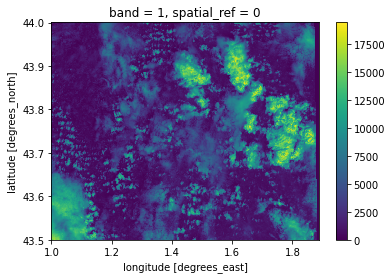

In [3]:
data.plot()